<a href="https://colab.research.google.com/github/a4abhishekkmr/Neural-Networks--ARTH/blob/master/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing pandas

In [2]:
import pandas as pd

In [3]:
#Importing DAtaset

In [4]:
dataset=pd.read_csv("/content/sample_data/Churn_Modelling.csv")

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
y = dataset['Exited']

In [8]:

X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                  'IsActiveMember', 'EstimatedSalary']]
X.shape

(10000, 8)

In [9]:
#One Hot Encoding For Geography Feature

In [10]:
Geo = pd.get_dummies(dataset['Geography'], drop_first=True)
Geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
#One Hot Encoding For Gender Feature

In [12]:
Gender = pd.get_dummies(dataset['Gender'], drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
X = pd.concat([X, Geo, Gender], axis=1)
X.shape

(10000, 11)

In [14]:
#importing train_test_split

#Before feeding your data into the neural network you need to split that data into training set and testing set. this can be done using

#train_test_split method from sklearn library and from model_selection module

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=40)

In [16]:

#importing Sequrntial Model From keras


In [17]:
from keras.models import Sequential
model = Sequential()            # creating Empty model

In [18]:
#Importing Dense Layer

In [19]:
from keras.layers import Dense

In [20]:
#Adding First Layer to model with neurons=8, input_feature=11 and activation fn = relu (rectified linear unit)

In [21]:
#1st layer
model.add(Dense(units=8, activation='relu', input_dim=11))

In [22]:
#Relu is an activation function i.e its will activate the neurons in the hidden layers. The main functions of relu is that all the output from a layers from all the neuron will pass to another layers of the respective neurons.

In [23]:
#Adding Second Layer with neurons=6 and activation fn = relu

In [24]:
model.add(Dense(units=6, activation='relu'))

In [25]:
#Adding third layer with neurons=6 and activation fn = relu

In [26]:
model.add(Dense(units=6, activation='relu'))

In [27]:
#Adding last layer with neurons=1 and activation fn = relu

In [28]:
model.add(Dense(units=1, activation='sigmoid'))

In [29]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 8,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Now

In [32]:
from keras.optimizers import Adam

In [33]:
#As i have only one output that whether the Employee is exited from the company or not. i.e Binary output (Exited/notexited). So the loss will be generating in binary. To handle the binary loss we have binary_crossentropy.

In [34]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.000001))

In [35]:
model.get_weights()

[array([[-0.01122618, -0.27259758, -0.04980361, -0.32155228,  0.16834158,
         -0.32384655, -0.26104826,  0.22258526],
        [-0.190445  ,  0.23211938, -0.213952  , -0.24173388, -0.4188779 ,
          0.04647636, -0.3447057 , -0.3795151 ],
        [ 0.0403927 ,  0.03649354, -0.04383332,  0.11914742,  0.45599884,
          0.38764286,  0.4741444 , -0.0342657 ],
        [-0.26526594,  0.45089334, -0.07035112, -0.20439857,  0.01313901,
         -0.44290423,  0.38648206, -0.13656855],
        [ 0.2676375 ,  0.18263263,  0.38463515, -0.5407284 ,  0.4608205 ,
          0.48152524,  0.14747465, -0.06098926],
        [ 0.15654308, -0.15882272,  0.11433089, -0.02524287,  0.5615036 ,
          0.11190426,  0.2362209 ,  0.10822004],
        [-0.28163812, -0.1610327 ,  0.5461889 ,  0.54460984, -0.37835616,
         -0.18736696, -0.55536085, -0.46753237],
        [ 0.5614889 , -0.22366044,  0.4973908 , -0.54318804,  0.44324583,
          0.40560216,  0.03605354, -0.33270848],
        [-0.3236

In [36]:
#For training the model we need to fit the model and it require training data i.e X_train, y_train. And the epochs is 100. That means your training data will goes 100 times through the neural network which you have build above with the respective layers.

In [37]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 2415.1622
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 2481.0863
Epoch 3/100
250/250 [==============================] - 0s 995us/step - loss: 2387.8070
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 2463.6774
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 2352.3323
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 2298.7175
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 2373.9990
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 2306.7440
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 2328.8472
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 2338.2959
Epoch 11/100
250/250 [==============================] - 0s 1000us/step - loss: 2428.2714
Epoch 12/100
250/250 [==============================] - 0s

In [38]:
loss = pd.DataFrame(model.history.history)
loss

,loss
0,2411.343506
1,2401.338867
2,2391.303955
3,2381.293457
4,2371.349121
...,...
95,1638.659302
96,1631.931030
97,1625.234741
98,1618.557739


In [39]:
#Plotting Loss Graph

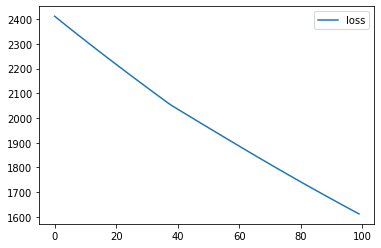

In [40]:
loss.plot()

In [41]:
#As you can see the graph of the loss is slowly decreasing. So this can be possible because of Adam Optimizers

In [42]:
#Prediction
# To predict i am just giving random iputs but you can use the right values and it will predict on that case.

In [43]:
print("The employee will  :", model.predict([[1,2,3,4,5,6,7,8,9,10,11]])[0][0])

The employee will  : 0.1003651
